In [1]:
import matplotlib.pyplot as plt # 데이터 시각화

import torch # PyTorch 라이브러리
import torch.nn as nn# 모델 구성을 위한 라이브러리
from torch.utils.data import DataLoader # optimizer 설정을 위한 라이브러리

import torchvision # PyTorch의 컴퓨터 비전 라이브러리
import torchvision.transforms as T # 이미지 변환을 위한 모듈
import torchvision.utils as vutils #  이미지를 쉽게 처리하기 위한 유틸리티 모듈


In [13]:
# seed 고정
import random
import torch.backends.cudnn as cudnn

def random_seed(seed_num):
    torch.manual_seed(seed_num)
    torch.cuda.manual_seed(seed_num)
    torch.cuda.manual_seed_all(seed_num)
    cudnn.benchmark = False
    cudnn.deterministic = True
    random.seed(seed_num)

random_seed(42)

In [28]:
# 데이터를 불러올 때, 필요한 변환(transform)을 정의
# T.Compose : 여러 개의 변환을 순서대로 묶어서 적용할 때 사용
# T.ToTensor : 이미지를 PyTorch에서 다룰 수 있는 Tensor로 변환
mnist_transform = T.Compose([ 
    T.ToTensor(),
])

In [29]:
# torchvision 라이브러리를 사용하여 MNIST Dataset을 불러오기
download_root = ',/MNIST_DATASET'

train_dataset = torchvision.datasets.MNIST(download_root, transform=mnist_transform, train= True, download = True)
test_dataset = torchvision.datasets.MNIST(download_root, transform=mnist_transform, train= False, download = True)

In [30]:
# image의 shape은 [C, H, W]로 구성됨
# C (Channel): 채널 수
# H (Height) : 이미지의 세로(높이) 픽셀 수
# W (Width) : 이미지의 가로(너비) 픽셀 수
for image, label in train_dataset:
    print(image.shape, label) 
    break

torch.Size([1, 28, 28]) 5


In [31]:
# train, valid 데이터 셋 나누기
total_size = len(train_dataset)
train_num, valid_num = int(total_size * 0.8), int(total_size * 0.2)
print(f"Train dataset 개수 : {train_num}")
print(f"Validation dataset 개수 : {valid_num}")
train_dataset, valid_dataset = torch.utils.data.random_split(train_dataset, [train_num, valid_num])

Train dataset 개수 : 48000
Validation dataset 개수 : 12000


In [32]:
# DataLoader는 인자로 주어진 Dataset을 이용하여, 단일 데이터들을 정해진 개수만큼 모아 미니 배치를 구성하는 역할
batch_size = 32

train_dataloader = DataLoader(train_dataset, batch_size = batch_size , shuffle = True) 
valid_dataloader = DataLoader(valid_dataset, batch_size = batch_size, shuffle = False)
test_dataloader = DataLoader(test_dataset, batch_size = batch_size , shuffle = False)


In [35]:
# 학습 데이터로더에서 일부의 미니 배치 데이터를 가져온다.
for images, labels in train_dataloader:
    print(images.shape, labels.shape)
    break


torch.Size([32, 1, 28, 28]) torch.Size([32])


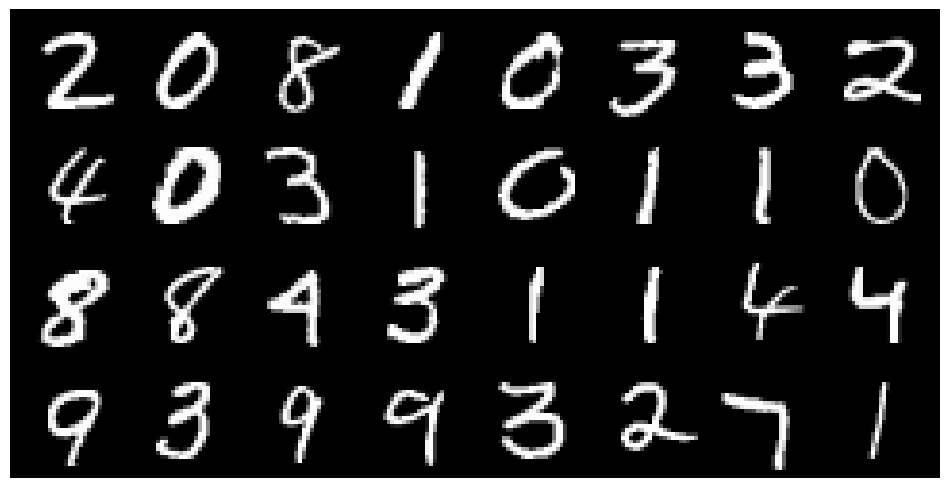

In [45]:
# 각 행마다 8개의 이미지 배치하여 격자로 구성한다.
grid = vutils.make_grid(images, nrow=8)

plt.figure(figsize=(12,12))
plt.imshow(grid.numpy().transpose((1,2,0)))
plt.axis("off")
plt.show()

In [ ]:
# nn.Linear(입력 벡터의 차원 크기, 출력 벡터의 차원 크기, bias = True (편향을 쓸지 여부))
# nn.identity() 아무 연산도 하지않는 레이어
# nn.BatchNorm1d(num_features = ) # (선형 레이어)나 RNN 출력처럼 (batch_size, features) 형태일 때
# nn.BatchNorm2d(num_features = ) CNN의 feature map 처럼 batch_size, channels, height, width 일 때
# nn.BatchNorm3d(num_features = ) 3D ConvNet(영상 등)처럼 batch_size, channels, depth, height, width 일 때

# 예시 1d
bn1d = nn.BatchNorm1d(num_features= 32)
x = torch.randn(32, 128) # [batch_sizez, feature]
y = bn1d(x)

# 예시 2d
bn1d = nn.BatchNorm1d(num_features= 64)
x = torch.randn(32, 64, 28, 28) # [batch_sizez, channels, height, width]
y = bn1d(x)

# 예시 3d
bn1d = nn.BatchNorm1d(num_features= 16)
x = torch.randn(8, 16, 10, 32, 32) # [batch_sizez, channels, depth, height, width]
y = bn1d(x)




In [ ]:
# nn.dropout : PyTorch에서 제공하는 드롭아웃 레이어
# 신경망의 일부 뉴련을 확률적으로 0으로 만들어 과적합을 줄이는 정규화

# 예시 dropout(ratio)
dropout = nn.Dropout(p=0.3) # p 확률값을 정의

x = torch.randn(5, 10)

dropout.train() # 훈련 모드
print(dropout(x)) # 일부 값이 0이 됨

dropout.eval()  # 평가 모드
print(dropout(x)) # 값이 그대로 나옴

In [ ]:
# nn.ReLU() : 음수 값은 전부 0 으로 출력하고, 0 보다 높은 값은 그대로 출력한다.
# 계산 단순하고, 기울기 소실 문제 완화 -> 양수 영역에서는 기울기가 항상 1이라 학습이 잘 진행됨
# 비선형성 추가 -> 모델이 단순 선형 관계를 넘어서 복잡한 패턴을 학습